### Importing Libraries and IBMQ Account

In [1]:
import qiskit as q
import qiskit.visualization as qv
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
IBMQ.load_account()

C:\Users\Sanket Lalwani\AppData\Local\Temp\ipykernel_8188\104988094.py:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
configrc.store_credentials:WARNING:2023-03-26 22:52:14,929: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Setting up the Quantum Circuit

#### For balanced function F6 in handout 9

In [3]:
circuit = QuantumCircuit(3,2)
circuit.i(0) ; circuit.i(1) ; circuit.x(2)
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.barrier()
circuit.cx(1,2) ; circuit.cx(0,2)
circuit.barrier()
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.measure(0,0) ; circuit.measure(1,1)
circuit.draw()

┌───┐┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ┤ I ├┤ H ├─░────────■───░─┤ H ├┤M├───
     ├───┤├───┤ ░        │   ░ ├───┤└╥┘┌─┐
q_1: ┤ I ├┤ H ├─░───■────┼───░─┤ H ├─╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐ ░ ├───┤ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░─┤ H ├─╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░ └───┘ ║  ║ 
c: 2/════════════════════════════════╩══╩═
                                     0  1

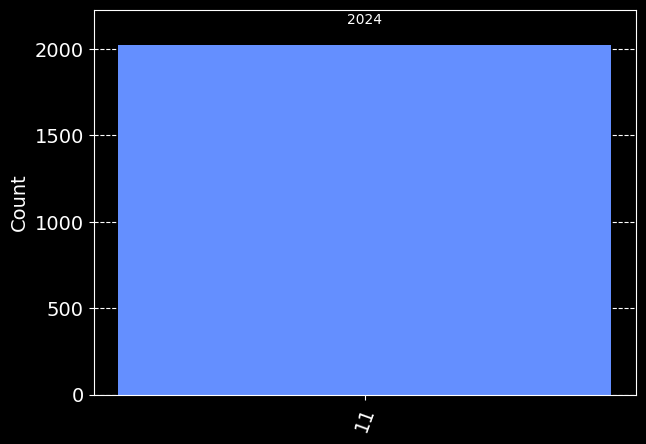

In [4]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [7]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


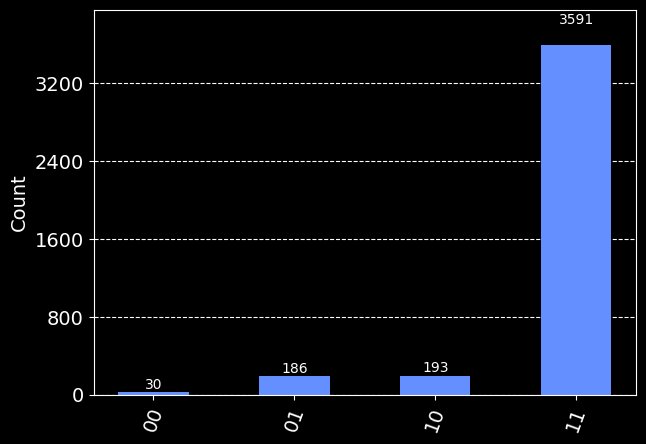

In [8]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)

#### For constant function f(x) = 0

In [11]:
circuit = QuantumCircuit(3,2)
circuit.i(0) ; circuit.i(1) ; circuit.x(2)
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.barrier()
circuit.i(0) ; circuit.i(1) ; circuit.i(2)
circuit.barrier()
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.measure(0,0) ; circuit.measure(1,1)
circuit.draw()

┌───┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─┐   
q_0: ┤ I ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├───
     ├───┤├───┤ ░ ├───┤ ░ ├───┤└╥┘┌─┐
q_1: ┤ I ├┤ H ├─░─┤ I ├─░─┤ H ├─╫─┤M├
     ├───┤├───┤ ░ ├───┤ ░ ├───┤ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ I ├─░─┤ H ├─╫──╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║  ║ 
c: 2/═══════════════════════════╩══╩═
                                0  1

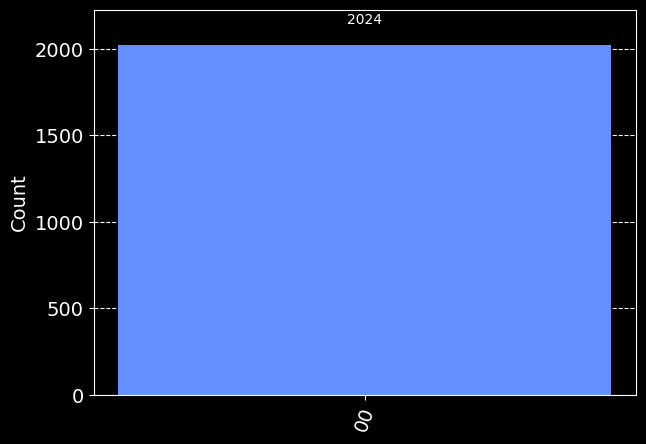

In [12]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [13]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


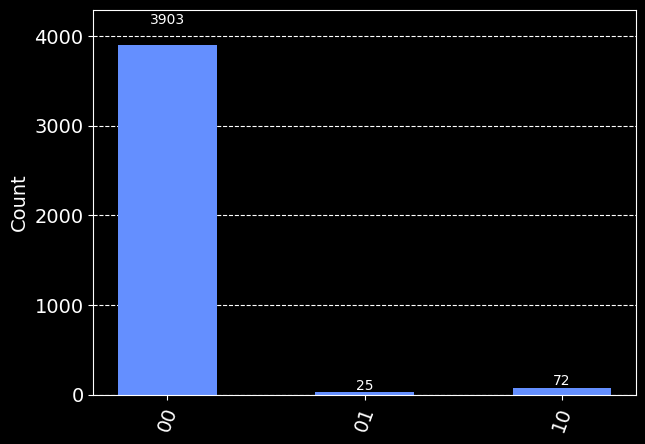

In [14]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)

#### For constant function f(x) = 1

In [16]:
circuit = QuantumCircuit(3,2)
circuit.i(0) ; circuit.i(1) ; circuit.x(2)
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.barrier()
circuit.i(0) ; circuit.x(2) ; circuit.i(1)
circuit.barrier()
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.measure(0,0) ; circuit.measure(1,1)
circuit.draw()

┌───┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─┐   
q_0: ┤ I ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├───
     ├───┤├───┤ ░ ├───┤ ░ ├───┤└╥┘┌─┐
q_1: ┤ I ├┤ H ├─░─┤ I ├─░─┤ H ├─╫─┤M├
     ├───┤├───┤ ░ ├───┤ ░ ├───┤ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫──╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║  ║ 
c: 2/═══════════════════════════╩══╩═
                                0  1

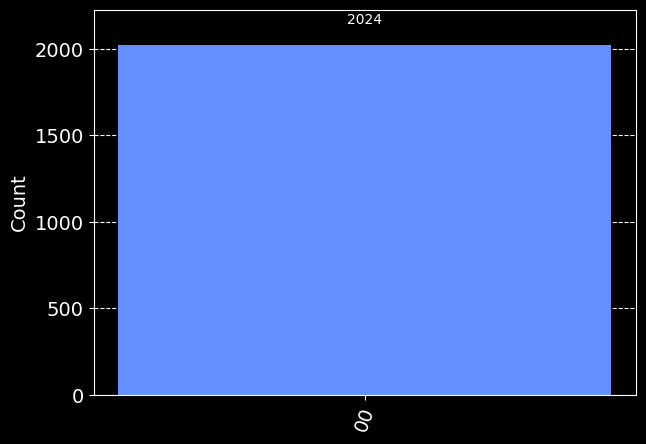

In [17]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [18]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


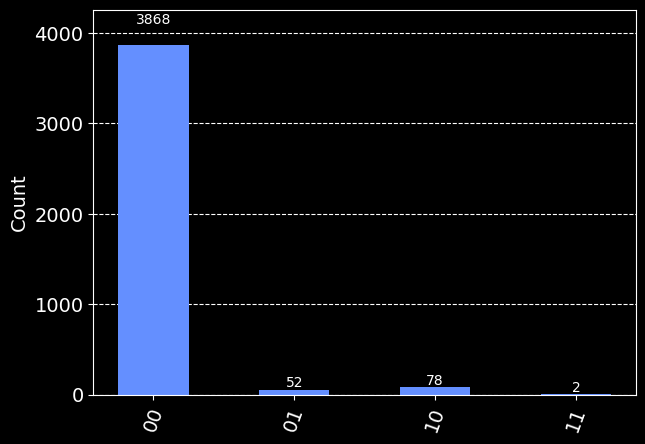

In [19]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)

#### For balanced function F5 from Handout 9 

In [20]:
circuit = QuantumCircuit(3,2)
circuit.i(0) ; circuit.i(1) ; circuit.x(2) ; 
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.barrier()
circuit.cx(1,2)
circuit.barrier()
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.measure(0,0) ; circuit.measure(1,1)
circuit.draw()

┌───┐┌───┐ ░       ░ ┌───┐┌─┐   
q_0: ┤ I ├┤ H ├─░───────░─┤ H ├┤M├───
     ├───┤├───┤ ░       ░ ├───┤└╥┘┌─┐
q_1: ┤ I ├┤ H ├─░───■───░─┤ H ├─╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐ ░ ├───┤ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫──╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║  ║ 
c: 2/═══════════════════════════╩══╩═
                                0  1

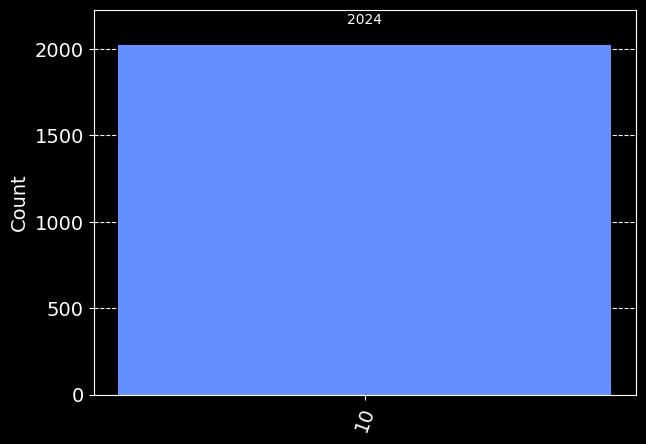

In [21]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [22]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


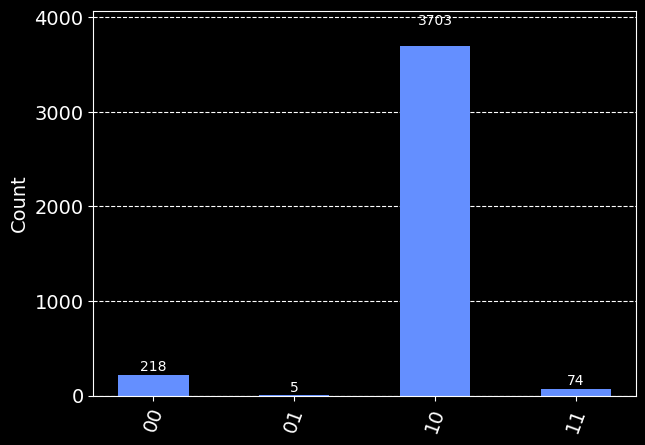

In [23]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)